In [101]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Set plot styles
sns.set(style="whitegrid")

In [19]:
# 2. Load and Preprocess the Data
# Load the dataset

df = pd.read_csv('C:/Users/shruti/Desktop/2nd year/DAI-101/TM_1950-03-01_2025-01-31.csv')

In [21]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
# Replace zero values in price columns with NaN to handle anomalies
price_columns = ['Open', 'High', 'Low', 'Close']
df[price_columns] = df[price_columns].replace(0, np.nan)


In [25]:
# Check for missing values
df = df.dropna()

In [29]:
#Set 'Date' as index for time series analysis
df.set_index('Date', inplace=True)

In [27]:
# 3. Exploratory Data Analysis (EDA)
# Descriptive statistics
desc_stats = df.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
                                 Date         Open         High          Low  \
count                           8331  8331.000000  8331.000000  8331.000000   
mean   2008-05-21 03:31:33.986316032    92.575164    93.090017    92.012155   
min              1980-03-19 00:00:00     3.237711     3.237711     3.237711   
25%              2000-03-28 12:00:00    55.400002    55.843750    55.087500   
50%              2008-07-11 00:00:00    83.000000    83.389999    82.500000   
75%              2016-10-17 12:00:00   123.169998   123.619999   122.500000   
max              2025-01-30 00:00:00   255.000000   255.229996   253.589996   
std                              NaN    44.785683    44.996045    44.517092   

             Close    Adj Close        Volume  
count  8331.000000  8331.000000  8.331000e+03  
mean     92.572005    82.771117  2.803543e+05  
min       3.237711     2.259451  0.000000e+00  
25%      55.500000    40.995037  3.240000e+04  
50%      83.062500    6

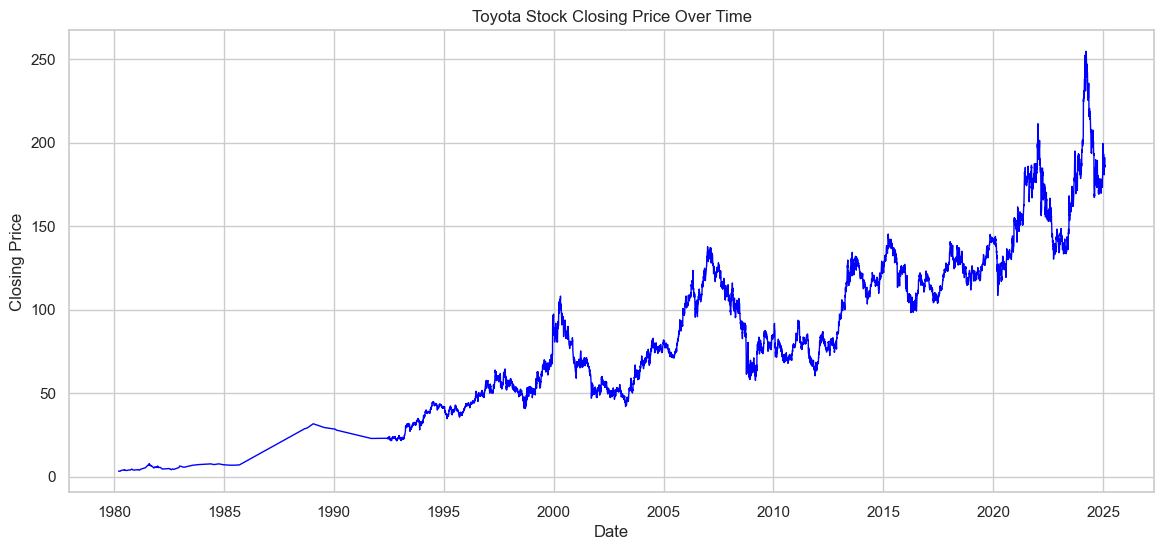

In [41]:
# Visualize closing price over time
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], color='blue', linewidth=1)
plt.title('Toyota Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


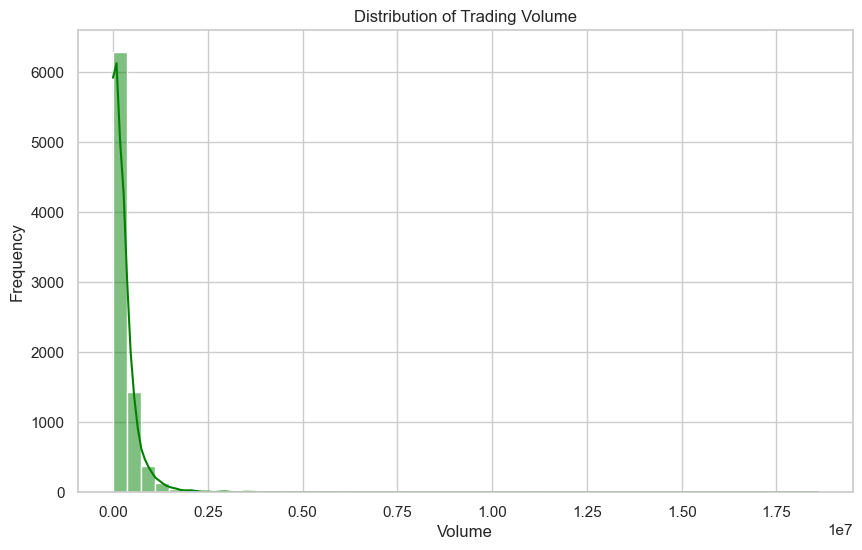

In [43]:
# Distribution of trading volume
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=50, kde=True, color='green')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


In [45]:
# 4. Time Series Analysis
# Decompose time series for trend, seasonality, and residuals
result = seasonal_decompose(df['Close'], model='multiplicative', period=252)  # Assuming 252 trading days in a year

<Figure size 1400x1000 with 0 Axes>

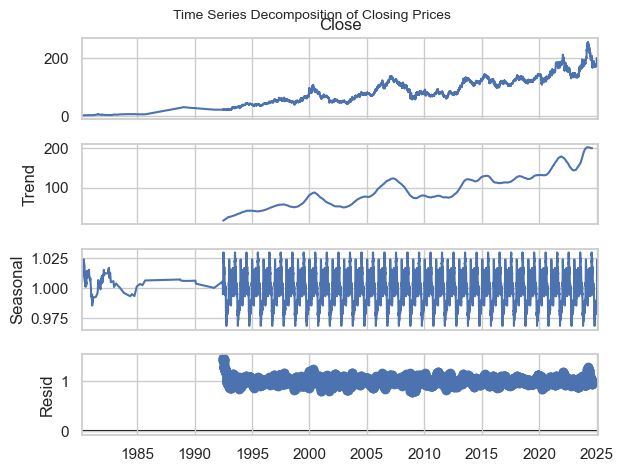

In [59]:
# Plot the decomposition
plt.figure(figsize=(14, 10))
result.plot()
plt.suptitle('Time Series Decomposition of Closing Prices', fontsize=10)
plt.show()


In [51]:
# 5. Basic Statistical Analysis
# Calculating rolling mean and standard deviation
rolling_mean = df['Close'].rolling(window=252).mean()
rolling_std = df['Close'].rolling(window=252).std()

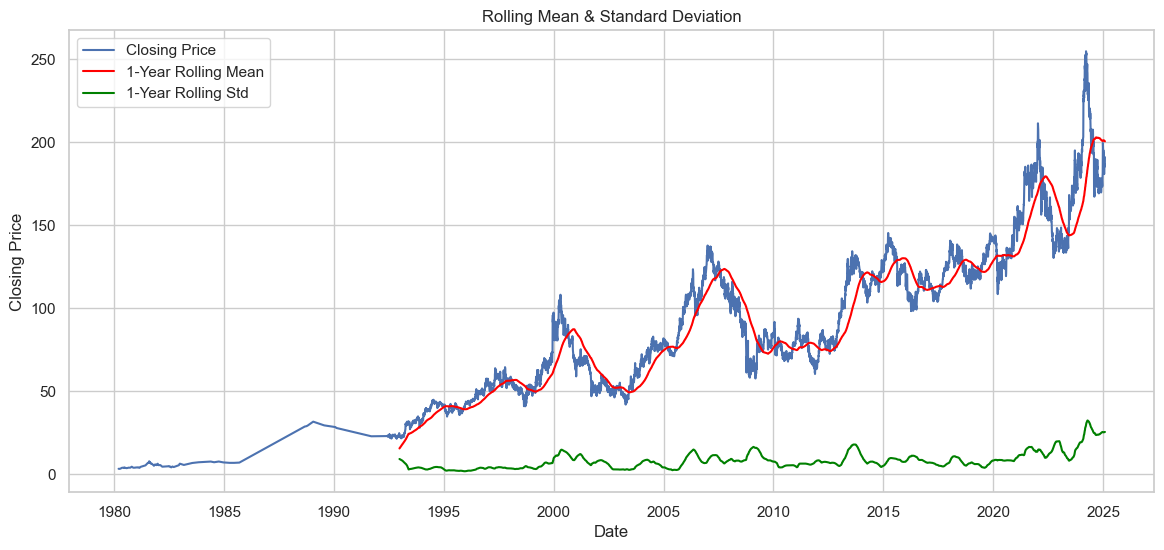

In [53]:
# Plot rolling statistics
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Closing Price')
plt.plot(rolling_mean, label='1-Year Rolling Mean', color='red')
plt.plot(rolling_std, label='1-Year Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

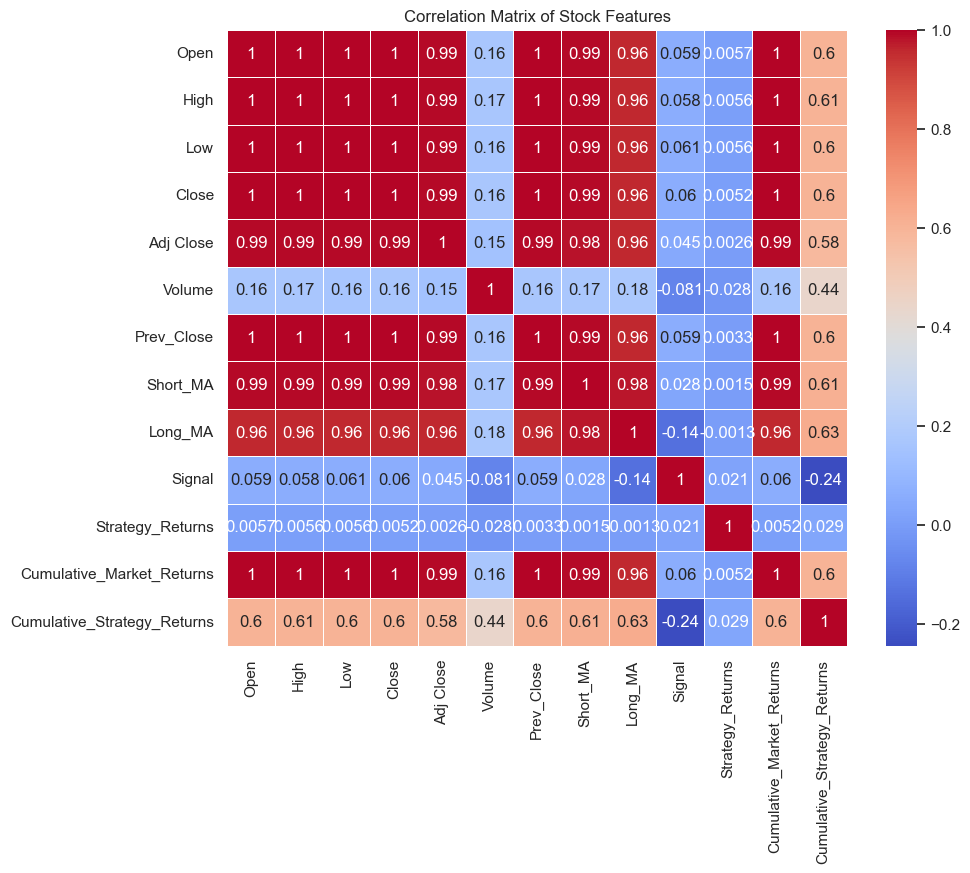

In [97]:
# 6. Multivariate Analysis
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Features')
plt.show()

In [103]:
# Principal Component Analysis (PCA)
# Standardize the features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])


In [105]:
# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


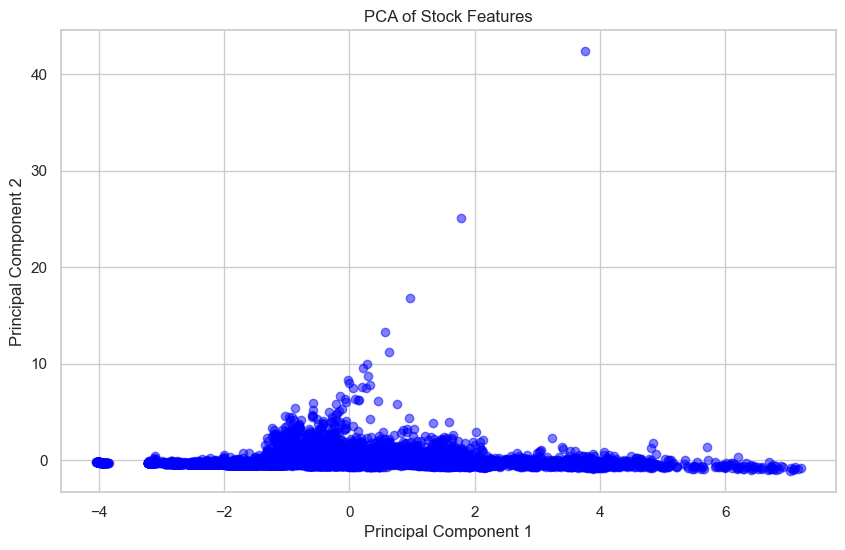

In [107]:
# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='blue', alpha=0.5)
plt.title('PCA of Stock Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [61]:
# 7. Predictive Modeling: Linear Regression for Stock Price Forecasting
# Prepare features and target
# Use previous day's closing price to predict the next day's price
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)


In [63]:
X = df[['Prev_Close']]
y = df['Close']


In [65]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [67]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [71]:
# Predictions
y_pred = model.predict(X_test)

In [73]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Predictive Model Evaluation:\nMean Squared Error: {mse}\nR-squared: {r2}')

Predictive Model Evaluation:
Mean Squared Error: 5.897817082495901
R-squared: 0.9934695540612806


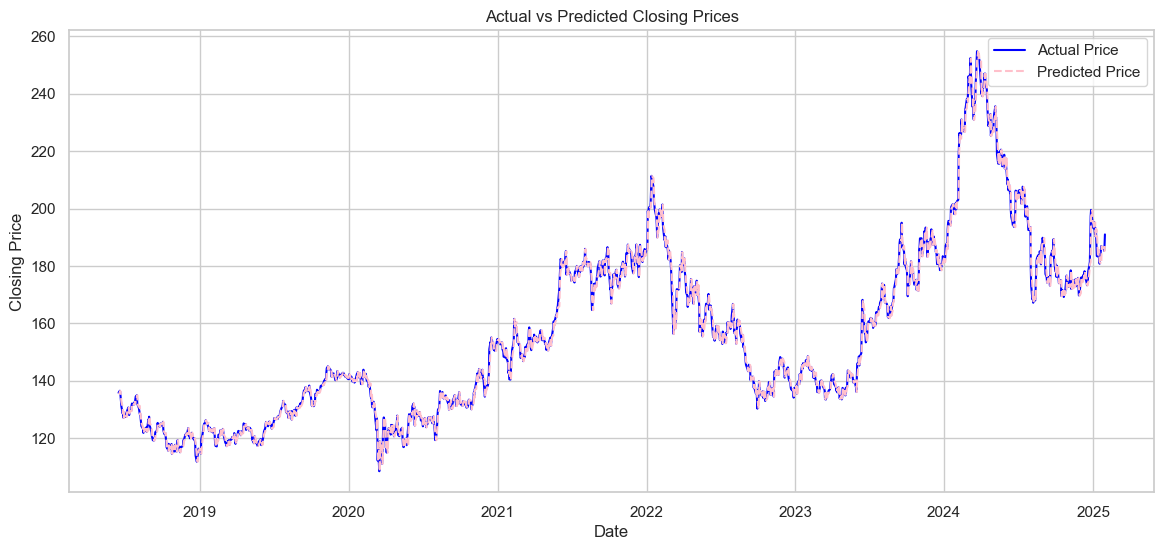

In [81]:
# Plot actual vs predicted prices
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='pink', linestyle='--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
# 8. Backtesting Trading Strategy: Moving Average Crossover
# Define short and long moving averages
df['Short_MA'] = df['Close'].rolling(window=50).mean()
df['Long_MA'] = df['Close'].rolling(window=200).mean()

In [85]:
# Generate trading signals
df['Signal'] = 0
# Buy signal
df.loc[df['Short_MA'] > df['Long_MA'], 'Signal'] = 1
# Sell signal
df.loc[df['Short_MA'] <= df['Long_MA'], 'Signal'] = -1


In [87]:
# Calculate strategy returns
df['Strategy_Returns'] = df['Signal'].shift(1) * df['Close'].pct_change()

In [89]:
# Cumulative returns comparison
df['Cumulative_Market_Returns'] = (1 + df['Close'].pct_change()).cumprod()
df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod()


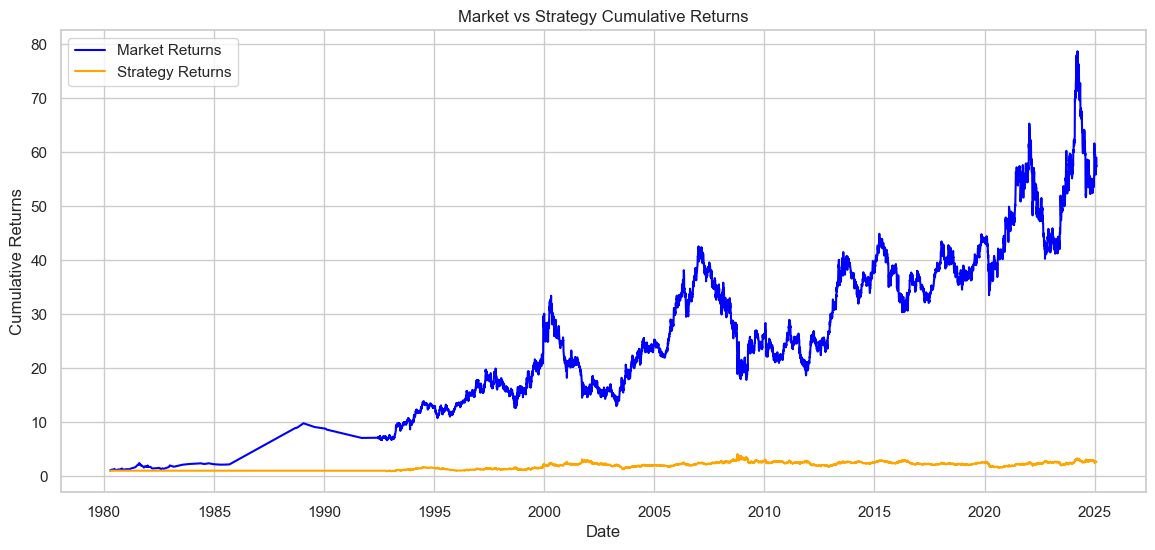

In [91]:
# Plot cumulative returns
plt.figure(figsize=(14, 6))
plt.plot(df['Cumulative_Market_Returns'], label='Market Returns', color='blue')
plt.plot(df['Cumulative_Strategy_Returns'], label='Strategy Returns', color='orange')
plt.title('Market vs Strategy Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [95]:
# 9. Conclusions
print("Conclusions:")
print("1. The stock has shown a long-term upward trend with some periods of volatility.")
print("2. The seasonal decomposition indicates possible yearly seasonality.")
print("3. The trading volume distribution shows periods of high activity which may correlate with significant market events.")
print("4. Rolling mean and standard deviation highlight periods of increased volatility and stable growth.")
print("5. Multivariate analysis revealed strong correlations between opening, high, low, and closing prices, suggesting these variables move together.")
print("6. PCA results show that two principal components explain most of the variance in stock features.")
print("7. Predictive modeling using linear regression shows a moderate ability to forecast short-term prices.")
print("8. The moving average crossover strategy offers potential for capturing trends and could be further optimized.")

Conclusions:
1. The stock has shown a long-term upward trend with some periods of volatility.
2. The seasonal decomposition indicates possible yearly seasonality.
3. The trading volume distribution shows periods of high activity which may correlate with significant market events.
4. Rolling mean and standard deviation highlight periods of increased volatility and stable growth.
5. Multivariate analysis revealed strong correlations between opening, high, low, and closing prices, suggesting these variables move together.
6. PCA results show that two principal components explain most of the variance in stock features.
7. Predictive modeling using linear regression shows a moderate ability to forecast short-term prices.
8. The moving average crossover strategy offers potential for capturing trends and could be further optimized.
